## <font color='red'>Leica Stereo Image analysis</font> 
### The purpose of this code is image analysis and ploting of the Leica Stereo which are first analyzed with the tierpsy-tracker.
#### https://github.com/Tierpsy/tierpsy-tracker
#### Ehsan Rezaei September 12th, 2022

In [53]:
import pandas as pd
import seaborn as sns
 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import dataframe_image as dfi

#from utils import *
from scipy.stats import mannwhitneyu, normaltest

from statannotations.Annotator import Annotator
import dabest
import matplotlib.ticker as ticker
from scipy.stats import f_oneway
import statistics

# Plotting and Statistical test source:
https://github.com/trevismd/statannotations-tutorials/blob/main/Tutorial_1/Statannotations-Tutorial-1.ipynb
and:
https://github.com/trevismd/statannotations
and:
https://github.com/trevismd/statannotations/blob/master/usage/example.ipynb

In [24]:
Leicadata = pd.read_excel('Speed_MidBody.xlsx',None)

pandas.core.frame.DataFrame

In [61]:
sheetName=Leicadata.keys()
sheetName= list(sheetName)

In [62]:
#for (dataa.columns, columnData) in dataa.iteritems():
print( len(dataa.columns))
#    print( columnData.values)
   

0


In [83]:
df1

,Genotype,Trial,Mean_Vel
0,N2,1,16.178698
1,N2,2,13.702677
2,N2,3,38.479420
3,dpy-7,1,123.907547
4,dpy-7,2,60.900740
5,dpy-7,3,121.370827
6,dpy-10,1,107.911938
7,dpy-10,2,179.621907
8,dpy-10,3,64.418605


In [97]:
appended_data = []
lst = []
cols = ['Genotype', 'Trial', 'Mean_Vel']
for x in range(len(sheetName)):
    Sheet=sheetName[x]
    print(sheetName[x])
    dataa=pd. read_excel('Speed_MidBody.xlsx', sheet_name=x)
    #print(len(dataa.columns)-1)
    Mean_col=statistics.mean(abs(dataa['W1'].dropna()) )
    
    
    lst.append([Sheet[0:-2], Sheet[-1], Mean_col])
    df1 = pd.DataFrame(lst, columns=cols)


    print(Mean_col)
    #print(abs(dataa['W1'].dropna()) )
    appended_data.append(Mean_col)
    
   # print(lst)
   # print(appended_data)
   # for n in range(len(dataa.columns)):
    #    datu= dataa[n]


N2_1
16.178697943157896
N2_2
13.70267731728395
N2_3
38.4794202878125
dpy-7_1
123.90754671403509
dpy-7_2
60.90073991
dpy-7_3
121.37082674029851
dpy-10_1
107.91193776829269
dpy-10_2
179.62190707916668
dpy-10_3
64.41860461641791


In [303]:
arr = np.empty((0,1), int)

cols = ['N2', 'dpy-7', 'dpy-10']


for ii in range(1,len(dataa.columns)):
    test1 =(abs(dataa.iloc[:,ii]).dropna())
    arr_test=np.array([test1.to_numpy()]).T

    arr = np.append(arr, arr_test)
    print(len(arr))

    

#df_z = df_z.append({'A': arr}, ignore_index=True)
#df_g(lenen = pd.DataFrame(arr, columns=cols)
print(len(test1))

67
139
208
240
315
379
459
498
571
607
668
741
73


In [437]:
ad = np.empty((2500,3,))
ad[:] = np.nan
cols = ['N2', 'dpy-7', 'dpy-10']
for x in range(len(sheetName)):
    arr = np.empty((0,1), int)
    Sheet=sheetName[x]
    print(Sheet)
    dataa=pd. read_excel('Speed_MidBody.xlsx', sheet_name=x)
    for ii in range(1,len(dataa.columns)):
        test1 =(abs(dataa.iloc[:,ii]).dropna())
        arr_test=np.array([test1.to_numpy()]).T
        arr = np.append(arr, arr_test)
    #print(len(arr))
  
    if Sheet[0:-2]== 'N2':
        nan_vector = np.isnan(ad[:,0]).argmax(axis=0)
        #print(nan_vector)
        if nan_vector==0:
            ad[0:len(arr),0] = arr
        else:
            ad[nan_vector:len(arr)+nan_vector,0] = arr
            
        nan_vector = np.isnan(ad[:,0]).argmax(axis=0)
        #print(nan_vector)

    elif Sheet[0:-2]== 'dpy-7':
        nan_vector = np.isnan(ad[:,1]).argmax(axis=0)
        #print(nan_vector)
        if nan_vector==0:
            ad[0:len(arr),1] = arr
        else:
            ad[nan_vector:len(arr)+nan_vector,1] = arr
            
        nan_vector = np.isnan(ad[:,1]).argmax(axis=0)
        #print(nan_vector)
        
    else:
        nan_vector = np.isnan(ad[:,2]).argmax(axis=0)
        #print(nan_vector)
        if nan_vector==0:
            ad[0:len(arr),2] = arr
        else:
            ad[nan_vector:len(arr)+nan_vector,2] = arr
            
        nan_vector = np.isnan(ad[:,2]).argmax(axis=0)
        #print(nan_vector)
    Mean_col=statistics.mean(arr)
    print(Mean_col)
    
pd.DataFrame(ad, columns=cols)

N2_1
23.512524360797688
N2_2
13.70267731728395
N2_3
19.939552890013044
dpy-7_1
115.50503377923184
dpy-7_2
100.08753172916886
dpy-7_3
104.54623918484786
dpy-10_1
85.52956196265194
dpy-10_2
139.2377436731564
dpy-10_3
64.29865460107962


,N2,dpy-7,dpy-10
0,12.653820,170.43253,127.759420
1,15.340629,147.87150,105.497970
2,26.025720,159.99875,140.948620
3,15.799791,0.00000,280.572480
4,99.756790,155.67410,29.046717
...,...,...,...
2495,NaN,NaN,NaN
2496,NaN,NaN,NaN
2497,NaN,NaN,NaN
2498,NaN,NaN,NaN


In [441]:
data_all = np.empty((7500,2,))
data_all[:] = np.nan
cols = ['speed', 'gen']

for x in range(len(sheetName)):
    arr = np.empty((0,1), int)
    Sheet=sheetName[x]
    print(Sheet)
    dataa=pd. read_excel('Speed_MidBody.xlsx', sheet_name=x)
    for ii in range(1,len(dataa.columns)):
        test1 =statistics.mean(abs(dataa.iloc[:,ii]).dropna())
        print(test1)
        arr_test=test1#np.array([test1.to_numpy()]).T
        
        #Mean_col=statistics.mean(abs(dataa['W1'].dropna()) )
        
        arr = np.append(arr, arr_test)
    #print(len(arr))
      
    
    nan_vector = np.isnan(data_all[:,0]).argmax(axis=0)
    #print(nan_vector)
    if nan_vector==0:
        data_all[0:len(arr),0] = arr
        if Sheet[0:-2]== 'N2':
            data_all[0:len(arr),1] = -1
        elif Sheet[0:-2]== 'dpy-7':
            data_all[0:len(arr),1] = -2
        else:
            data_all[0:len(arr),1] = -3
    else:
        data_all[nan_vector:len(arr)+nan_vector,0] = arr
        if Sheet[0:-2]== 'N2':
            data_all[nan_vector:len(arr)+nan_vector,1] = -1
        elif Sheet[0:-2]== 'dpy-7':
            data_all[nan_vector:len(arr)+nan_vector,1] = -2
        else:
            data_all[nan_vector:len(arr)+nan_vector,1] = -3
        

    nan_vector = np.isnan(data_all[:,0]).argmax(axis=0)
    #print(nan_vector)
    
all_d = pd.DataFrame(data_all,columns=cols)
all_df = all_d.replace([-1, -2, -3], ['N2', 'dpy-7', 'dpy-10'])

N2_1
16.178697943157896
9.005830326792452
12.286787515
46.13898717777778
112.09650759838709
12.525548739473685
16.190074331473685
20.934801017391305
18.551864686226416
9.092546168421052
8.82523617568421
N2_2
13.70267731728395
N2_3
38.4794202878125
10.411119663595505
5.5304394455
10.246406751348315
10.296751251685393
8.7657127575
7.879013150323944
16.20288100983871
63.16280517931035
26.319474697407408
47.01885609925926
dpy-7_1
123.90754671403509
164.20269983207547
118.03667998289474
101.46082139298245
128.59258494635137
129.68830437704918
117.34577673589743
132.11871714634145
67.73271189333333
117.94749086862745
105.99664105660378
78.63263638714285
dpy-7_2
60.90073991
75.3989211734375
110.83405069039473
92.73989114666666
68.29120696666666
39.5193601755102
143.4647957902439
100.76838984523809
115.21035712133333
153.85542656466666
131.13782970625
119.84946854526316
119.46376821016949
53.73922471111111
139.82330125641025
67.194330190625
90.762158744
153.86958557377048
60.59232074202899
dpy

[ 13.70267732  95.73704788 108.55864093]
[ 23.4714104   98.2756193  105.72968682]
['(23)', '(43)', '(35)']
range(0, 3)


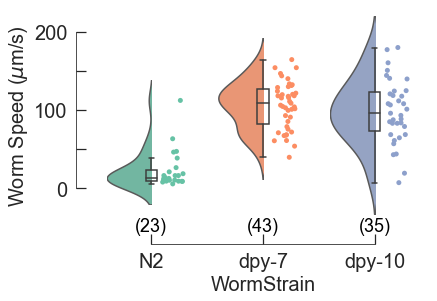

In [467]:
sns.set_style('ticks')
#sns.set_style('white')
palette = 'Set2'

#MyGenoList = (['wild type','dpy-10','dpy-7'])

ax = sns.violinplot(x="gen", y="speed", data=all_df,  dodge=False,
                    palette=palette,
                    scale="width", inner=None)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))
    
sns.boxplot(x="gen", y="speed", data=all_df, saturation=1, showfliers=False,
            width=0.1, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)

old_len_collections = len(ax.collections)
sns.stripplot(x="gen", y="speed", data=all_df, palette=palette, dodge=False, ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.2, 0]))
        # Calculate number of obs per group & median to position labels
medians = all_df.groupby(["gen"])["speed"].median().values
means = all_df.groupby(["gen"])["speed"].mean().values
print(medians)
print(means)
#print(Strains)
nobss = all_df['gen'].value_counts().values
nobs=np.array([nobss[2], nobss[0], nobss[1]])

nobs = ["("+ str(x)+")" for x in nobs.tolist()]
print(nobs)
#nobs = [str(i) for i in nobs]
pos = range(len(nobs))
print(pos)
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick],  -55, nobs[tick],
            horizontalalignment='center', fontsize=18 , color='k', weight='normal')
#ax.set(ylim=(0, 3.5))
ax.set_ylabel("Worm Speed ($\mu$m/s)", size = 20)
ax.set_xlabel("WormStrain", size = 20)

#ax.legend_.remove()
sns.despine(offset=20, trim=True);
ax.tick_params('both', length=10, width=1.25, which='major')
#majors = ["0"," ", "1","", "2","", "3"]
#ax.yaxis.set_major_formatter(ticker.FixedFormatter(majors))
ax.tick_params(axis="y",direction="in", pad=8)
ax.tick_params(axis="x",direction="in", pad=8)
    


plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)

for index, label in enumerate(ax.get_yticklabels()):
    if index % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
    
plt.show()

ax.figure.savefig('WormSpeed'+'.tiff', dpi=200, bbox_inches='tight')

N2_1
N2_2
N2_3
dpy-7_1
dpy-7_2
dpy-7_3
dpy-10_1
dpy-10_2
dpy-10_3


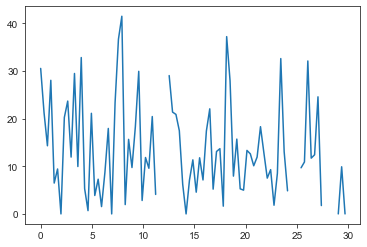

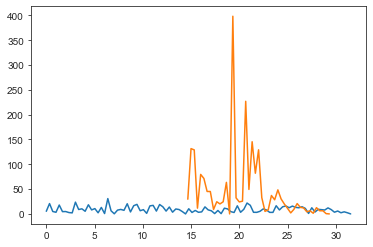

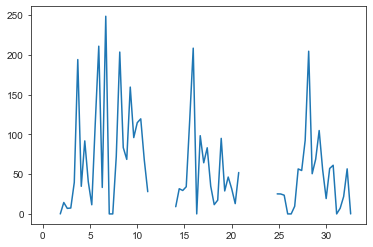

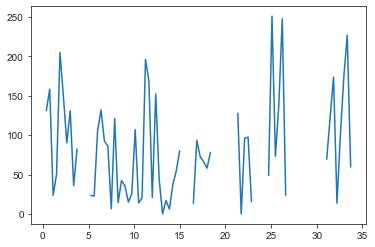

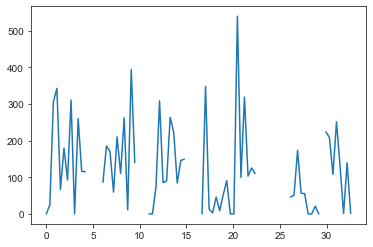

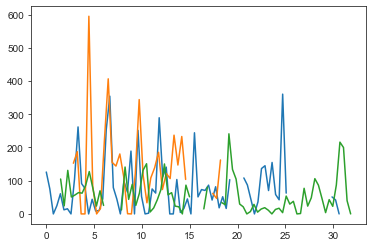

In [506]:
for x in range(len(sheetName)):
    arr = np.empty((0,1), int)
    Sheet=sheetName[x]
    print(Sheet)
    dataa=pd. read_excel('Speed_MidBody.xlsx', sheet_name=x)
    for ii in range(0,len(dataa.columns)):
       # if Sheet== "N2_1" or Sheet=="dpy-7_1"or Sheet=="dpy-10_1":
        
        if ii==0:
            Tim = abs(dataa.iloc[:,ii])
            arr_Tim=np.array([Tim.to_numpy()]).T

        else:
            val =abs(dataa.iloc[:,ii])
            arr_val=np.array([val.to_numpy()]).T

    plt.figure(ii)
    plt.plot(arr_Tim,arr_val)
plt.show()
